# Project

In [12]:
# IMPORTING PICKLE AND RELEVANT PICKLE FILES
import pickle
us_to_uk_mapping = pickle.load(open("pickle/us_gb_updated.pkl", "rb"))

# IMPORTING TEXT PREPROCESSING LIBRARIES
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# downloading nltk packages
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')

# IMPORTING OTHER RELEVANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import sqrt  
import os
import io
import random
import re
import time


# IMPORTING SKLEARN PACKAGES
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [6]:
true_df = pd.read_csv('data/True.csv', encoding='utf-8')
fake_df = pd.read_csv('data/Fake.csv', encoding='utf-8')

## EDA of True.csv

In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_df.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
true_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [8]:
true_df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

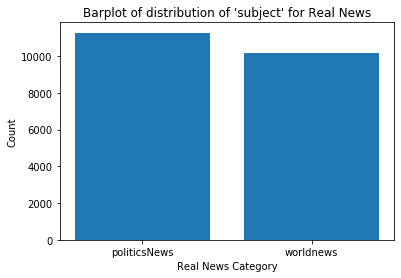

In [52]:
plt.bar(['politicsNews', 'worldnews'], [11272, 10145])
plt.xlabel("Real News Category") 
plt.ylabel("Count") 
plt.title("Barplot of distribution of 'subject' for Real News") 
plt.show() 

In [37]:
# generate a random article to see what needs to be cleaned
true_df['text'][random.randint(0,10000)]

'BELLEVILLE, Ill. (Reuters) - The suspect who opened fire on Republican lawmakers as they played baseball on Wednesday raged against Republican U.S. President Donald Trump on social media and idolized Bernie Sanders, whom he saw as the only politician who understood the working class. Authorities identified the gunman as James Hodgkinson, a 66-year-old home inspector from the St. Louis suburb of Belleville, Illinois. He died from injuries sustained in a shoot-out with Capitol Hill police who were at the scene in Alexandria, Virginia, outside Washington.  Hodgkinson is believed by investigators to have been a person “of strong views,” a senior U.S. official said, without elaborating. The Belleville News-Democrat newspaper posted a photograph of Hodgkinson protesting outside a post office there in 2012, wearing sunglasses and a goatee and holding a homemade placard that read “TAX the Rich.” Hodgkinson was a member of many anti-Republican groups on Facebook including “The Road to Hell Is 

In [32]:
# news article containing tweets
true_df['text'][1967]

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - The U.S. has been talking to North Korea, and paying them extortion money, for 25 years. Talking is not the answer! [0847 EDT] - After witnessing first hand the horror & devastation caused by Hurricane Harvey,my heart goes out even more so to the great people of Texas! [0912 EDT] - After reading the false reporting and even ferocious anger in some dying magazines, it makes me wonder, WHY? All I want to do is #MAGA! [0927 EDT]  - Will be leaving for Missouri soon for a speech on tax cuts and tax reform - so badly needed! [0942 EDT] - Texas & Louisiana: We are w/ you today, we are w/ you tomorrow, & we will be w/ you EVERY SINGLE DAY AFTER, to restore, recover, & REBUILD! [1538 EDT]  - First responders have been doing heroic wor

In [34]:
# news article containing regular news
true_df['text'][209]

' (Corrects paragraph 7 to show Trump issued a warning on travel to Cuba, not a ban on travel to Cuba) HAVANA (Reuters) - Cuba told senior U.S. officials during talks on migration in Havana on Monday that the U.S. decision to suspend visa processing at its embassy on the island was “seriously hampering” family relations and other people exchanges. Relations between the former Cold War foes became strained after Donald Trump became the U.S. President, partially reversing the thaw seen during Barack Obama’s presidency.  In September, after allegations of incidents affecting the health of its diplomats in Havana, the U.S. administration reduced its embassy to a skeleton staff, resulting in the suspension of almost all visa processing. “The Cuban delegation expressed deep concern over the negative impact that the unilateral, unfounded and politically motivated decisions adopted by the U.S. government ... have on migration relations between both countries,” the Cuban foreign ministry said i

In [54]:
# average token count of Real News
total_len = len(true_df)
total = 0
for i in range(total_len):
    total += len((true_df['text'][i]).split())

print(total/total_len)

385.6400989867862


In [55]:
# average token count of Fake News
total_len = len(fake_df)
total = 0
for i in range(total_len):
    total += len((fake_df['text'][i]).split())

print(total/total_len)

423.1979046888974


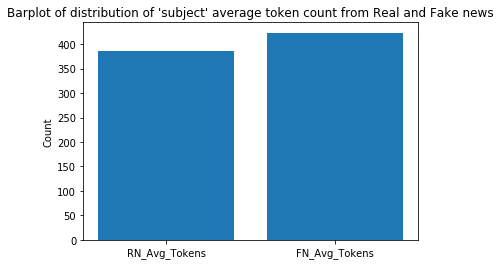

In [57]:
# visualisation of average token count in real and fake news
plt.bar(['RN_Avg_Tokens', 'FN_Avg_Tokens'], [385, 423]) 
plt.ylabel("Count") 
plt.title("Barplot of distribution of 'subject' average token count from Real and Fake news") 
plt.show() 

In [17]:
# check for empty values
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## EDA of Fake.csv

In [13]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


False

In [18]:
# 9360
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [29]:
fake_df['text'][11335]

' '

In [31]:
true_df[true_df['text'] == ' ']

,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


In [30]:
# rows with 'text' as just a single whitespace ' 
fake_df[fake_df['text'] == ' ']

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [17]:
for row in np.array(fake_df['date']):
    print(row)

December 31, 2017
December 31, 2017
December 30, 2017
December 29, 2017
December 25, 2017
December 25, 2017
December 23, 2017
December 23, 2017
December 22, 2017
December 21, 2017
December 21, 2017
December 21, 2017
December 21, 2017
December 20, 2017
December 20, 2017
December 20, 2017
December 19, 2017
December 17, 2017
December 17, 2017
December 16, 2017
December 16, 2017
December 13, 2017
December 12, 2017
December 12, 2017
December 12, 2017
December 12, 2017
December 11, 2017
December 10, 2017
December 9, 2017
December 7, 2017
December 7, 2017
December 7, 2017
December 6, 2017
December 6, 2017
December 6, 2017
December 5, 2017
December 5, 2017
December 5, 2017
December 5, 2017
December 4, 2017
December 3, 2017
December 3, 2017
December 2, 2017
December 2, 2017
December 1, 2017
December 1, 2017
December 1, 2017
December 1, 2017
November 30, 2017
November 30, 2017
November 30, 2017
November 29, 2017
November 29, 2017
November 29, 2017
November 29, 2017
November 28, 2017
November 28,

April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 7, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 6, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 5, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 4, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 3, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 2, 2017
April 

December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 18, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 17, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 16, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 15, 2016
December 14, 2016
December 14, 2016
December 14, 2016
December 14, 2016
December 14, 2016
December 14, 2016
December 14, 2016
December 14, 2016
December 1

August 9, 2016
August 9, 2016
August 9, 2016
August 9, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 8, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 7, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 6, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 5, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 4, 2016
August 3, 

April 30, 2016
April 30, 2016
April 30, 2016
April 30, 2016
April 30, 2016
April 30, 2016
April 30, 2016
April 30, 2016
April 30, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 29, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 28, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 27, 2016
April 26, 2016
April 26, 2016
April 26, 2016
April 26, 2016
April 26, 

February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 3, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 2, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
February 1, 2016
January 31, 2016
January 31, 2016
January 31, 2016
January 31, 2016
January 31, 20

Jul 20, 2017
Jul 20, 2017
Jul 20, 2017
Jul 20, 2017
Jul 20, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 19, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 18, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 17, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 16, 2017
Jul 15, 2017
Jul 15, 2017
Jul 15, 2017
Jul 15, 2017
Jul 15, 2017
Jul 14, 2017
Jul 14, 2017
Jul 14, 2017
Jul 14, 2017
Jul 14, 2017
Jul 14, 2017
Jul 14, 2017
Jul 14, 2017
Jul 13, 2017
Jul 13, 2017
Jul 13, 2017
Jul 13, 2017
Jul 13, 2017
Jul 13, 2017
Jul 13, 2017
Jul 12, 2017
Jul 12, 2017
Jul 12, 2017
Jul 12, 2017
Jul 12, 2017
Jul 12, 2017
Jul 11, 2017
Jul 11, 2017
Jul 11, 2017
Jul 11, 2017
Jul 11, 2017
Jul 11, 2017
Jul 11, 2017

Nov 20, 2016
Nov 19, 2016
Nov 19, 2016
Nov 19, 2016
Nov 19, 2016
Nov 19, 2016
Nov 19, 2016
Nov 19, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 18, 2016
Nov 17, 2016
Nov 17, 2016
Nov 17, 2016
Nov 17, 2016
Nov 17, 2016
Nov 17, 2016
Nov 17, 2016
Nov 16, 2016
Nov 16, 2016
Nov 16, 2016
Nov 16, 2016
Nov 16, 2016
Nov 16, 2016
Nov 16, 2016
Nov 16, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 15, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 14, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 13, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 12, 2016
Nov 11, 2016

Mar 7, 2016
Mar 7, 2016
Mar 7, 2016
Mar 7, 2016
Mar 6, 2016
Mar 6, 2016
Mar 6, 2016
Mar 6, 2016
Mar 6, 2016
Mar 6, 2016
Mar 5, 2016
Mar 5, 2016
Mar 5, 2016
Mar 5, 2016
Mar 5, 2016
Mar 5, 2016
Mar 4, 2016
Mar 4, 2016
Mar 4, 2016
Mar 4, 2016
Mar 3, 2016
Mar 3, 2016
Mar 3, 2016
Mar 2, 2016
Mar 2, 2016
Mar 2, 2016
Mar 2, 2016
Mar 2, 2016
Mar 2, 2016
Mar 2, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Mar 1, 2016
Feb 29, 2016
Feb 29, 2016
Feb 29, 2016
Feb 29, 2016
Feb 29, 2016
Feb 29, 2016
Feb 28, 2016
Feb 28, 2016
Feb 28, 2016
Feb 28, 2016
Feb 28, 2016
Feb 28, 2016
Feb 28, 2016
Feb 28, 2016
Feb 27, 2016
Feb 27, 2016
Feb 27, 2016
Feb 27, 2016
Feb 27, 2016
Feb 26, 2016
Feb 26, 2016
Feb 26, 2016
Feb 26, 2016
Feb 26, 2016
Feb 26, 2016
Feb 25, 2016
Feb 25, 2016
Feb 25, 2016
Feb 25, 2016
Feb 25, 2016
Feb 25, 2016
Feb 24, 2016
Feb 24, 2016
Feb 24, 2016
Feb 24, 2016
Feb 24, 2016
Feb 24, 2016
Feb 23, 2016
Feb 23, 2016
Feb 23, 2016
Feb 23, 2016

Jun 3, 2017
Jun 2, 2017
Jun 1, 2017
Jun 1, 2017
May 31, 2017
May 26, 2017
May 26, 2017
May 25, 2017
May 25, 2017
May 24, 2017
May 24, 2017
May 24, 2017
May 23, 2017
May 23, 2017
May 21, 2017
May 19, 2017
May 18, 2017
May 18, 2017
May 18, 2017
May 17, 2017
May 17, 2017
May 17, 2017
May 17, 2017
May 17, 2017
May 17, 2017
May 16, 2017
May 16, 2017
May 16, 2017
May 16, 2017
May 15, 2017
May 15, 2017
May 15, 2017
May 15, 2017
May 13, 2017
May 13, 2017
May 11, 2017
May 11, 2017
May 10, 2017
May 10, 2017
May 10, 2017
May 10, 2017
May 10, 2017
May 9, 2017
May 9, 2017
May 8, 2017
May 6, 2017
May 5, 2017
May 5, 2017
May 5, 2017
May 3, 2017
May 3, 2017
May 3, 2017
May 2, 2017
May 2, 2017
Apr 30, 2017
Apr 27, 2017
Apr 26, 2017
Apr 26, 2017
Apr 26, 2017
Apr 25, 2017
Apr 24, 2017
Apr 21, 2017
Apr 19, 2017
Apr 15, 2017
Apr 15, 2017
Apr 15, 2017
Apr 15, 2017
Apr 14, 2017
Apr 14, 2017
Apr 13, 2017
Apr 11, 2017
Apr 11, 2017
Apr 11, 2017
Apr 10, 2017
Apr 10, 2017
Apr 9, 2017
Apr 8, 2017
Apr 8, 2017
Apr 8

Oct 7, 2017
Oct 7, 2017
Oct 6, 2017
Oct 6, 2017
Oct 5, 2017
Oct 5, 2017
Oct 5, 2017
Oct 5, 2017
Oct 5, 2017
Oct 4, 2017
Oct 4, 2017
Oct 4, 2017
Oct 4, 2017
Oct 4, 2017
Oct 3, 2017
Oct 3, 2017
Oct 3, 2017
Oct 3, 2017
Oct 2, 2017
Oct 2, 2017
Oct 2, 2017
Oct 2, 2017
Oct 2, 2017
Oct 1, 2017
Oct 1, 2017
Oct 1, 2017
Oct 1, 2017
Oct 1, 2017
Oct 1, 2017
Oct 1, 2017
Sep 30, 2017
Sep 30, 2017
Sep 30, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 29, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 28, 2017
Sep 27, 2017
Sep 27, 2017
Sep 27, 2017
Sep 27, 2017
Sep 27, 2017
Sep 27, 2017
Sep 26, 2017
Sep 26, 2017
Sep 26, 2017
Sep 26, 2017
Sep 26, 2017
Sep 26, 2017
Sep 26, 2017
Sep 26, 2017
Sep 25, 2017
Sep 25, 2017
Sep 25, 2017
Sep 25, 2017
Sep 25, 2017
Sep 25, 2017
Sep 25, 2017
Sep 25, 2017
Sep 24, 2017
Sep 24, 2017
Sep 24, 2017
Sep 24, 2017
Sep 24, 2017
Sep 24, 2017
Sep

Oct 7, 2016
Oct 7, 2016
Oct 7, 2016
Oct 7, 2016
Oct 7, 2016
Oct 7, 2016
Oct 7, 2016
Oct 6, 2016
Oct 6, 2016
Oct 6, 2016
Oct 6, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 5, 2016
Oct 4, 2016
Oct 4, 2016
Oct 4, 2016
Oct 4, 2016
Oct 3, 2016
Oct 3, 2016
Oct 3, 2016
Oct 3, 2016
Oct 3, 2016
Oct 3, 2016
Oct 3, 2016
Oct 3, 2016
Oct 2, 2016
Oct 2, 2016
Oct 2, 2016
Oct 2, 2016
Oct 2, 2016
Oct 2, 2016
Oct 2, 2016
Oct 1, 2016
Oct 1, 2016
Oct 1, 2016
Oct 1, 2016
Oct 1, 2016
Oct 1, 2016
Oct 1, 2016
Oct 1, 2016
Sep 30, 2016
Sep 30, 2016
Sep 29, 2016
Sep 29, 2016
Sep 29, 2016
Sep 29, 2016
Sep 29, 2016
Sep 29, 2016
Sep 29, 2016
Sep 29, 2016
Sep 28, 2016
Sep 28, 2016
Sep 28, 2016
Sep 28, 2016
Sep 28, 2016
Sep 27, 2016
Sep 27, 2016
Sep 27, 2016
Sep 27, 2016
Sep 27, 2016
Sep 26, 2016
Sep 26, 2016
Sep 26, 2016
Sep 26, 2016
Sep 26, 2016
Sep 25, 2016
Sep 25, 2016
Sep 25, 2016
Sep 25, 2016
Sep 25, 2016
Sep 24, 2016
Sep 24, 2016
Sep 23, 2016
Sep 23,

Apr 16, 2015
Apr 16, 2015
Apr 16, 2015
Apr 15, 2015
Apr 15, 2015
Apr 15, 2015
Apr 14, 2015
Apr 14, 2015
Apr 14, 2015
Apr 14, 2015
Apr 14, 2015
Apr 14, 2015
Apr 14, 2015
Apr 14, 2015
Apr 13, 2015
Apr 13, 2015
Apr 13, 2015
Apr 13, 2015
Apr 12, 2015
Apr 12, 2015
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
Apr 12, 2015
Apr 12, 2015
Apr 12, 2015
Apr 12, 2015
Apr 11, 2015
Apr 11, 2015
Apr 10, 2015
Apr 10, 2015
Apr 10, 2015
Apr 10, 2015
Apr 9, 2015
Apr 9, 2015
Apr 9, 2015
Apr 9, 2015
Apr 9, 2015
Apr 9, 2015
Apr 9, 2015
Apr 9, 2015
Apr 8, 2015
Apr 8, 2015
Apr 8, 2015
Apr 8, 2015
Apr 7, 2015
Apr 7, 2015
Apr 7, 2015
Apr 7, 2015
Apr 7, 2015
Apr 7, 2015
Apr 7, 2015
Apr 7, 2015
Apr 6, 2015
Apr 6, 2015
Apr 6, 2015
Apr 6, 2015
Apr 6, 2015
Apr 6, 2015
Apr 6, 2015
Apr 6, 2015
Apr 5, 2015
Apr 5, 2015
Apr 5, 2015
Apr 5, 2015
Apr 5, 2015
Apr 5, 2015
Apr 4, 2015
Apr 4, 2015
Apr 1, 2015
Mar 31, 2015
Mar 31, 201

In [18]:
lst = []
for row in np.array(fake_df['date']):
    lst.append(row)

['December 31, 2017', 'December 31, 2017', 'December 30, 2017', 'December 29, 2017', 'December 25, 2017', 'December 25, 2017', 'December 23, 2017', 'December 23, 2017', 'December 22, 2017', 'December 21, 2017', 'December 21, 2017', 'December 21, 2017', 'December 21, 2017', 'December 20, 2017', 'December 20, 2017', 'December 20, 2017', 'December 19, 2017', 'December 17, 2017', 'December 17, 2017', 'December 16, 2017', 'December 16, 2017', 'December 13, 2017', 'December 12, 2017', 'December 12, 2017', 'December 12, 2017', 'December 12, 2017', 'December 11, 2017', 'December 10, 2017', 'December 9, 2017', 'December 7, 2017', 'December 7, 2017', 'December 7, 2017', 'December 6, 2017', 'December 6, 2017', 'December 6, 2017', 'December 5, 2017', 'December 5, 2017', 'December 5, 2017', 'December 5, 2017', 'December 4, 2017', 'December 3, 2017', 'December 3, 2017', 'December 2, 2017', 'December 2, 2017', 'December 1, 2017', 'December 1, 2017', 'December 1, 2017', 'December 1, 2017', 'November 3

In [15]:
fake_df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [49]:
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

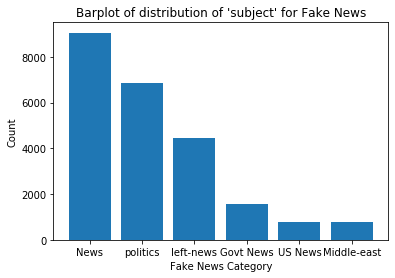

In [50]:
plt.bar(['News', 'politics', 'left-news', 'Govt News', 'US News', 'Middle-east'], 
        [9050, 6841, 4459, 1570, 783, 778])
plt.xlabel("Fake News Category") 
plt.ylabel("Count") 
plt.title("Barplot of distribution of 'subject' for Fake News") 
plt.show() 

## Data preprocessing

1. Removal of source of article at the start of each text (for real news only)<br>
2. Removal of words within brackets <br>
3. Removal of punctuations and special characters <br>
4. Removal of stop words <br>
5. Tokenization and lemmatization of words <br>
6. Converting US english to UK english <br>
7. Vectorisation of tokens <br>


In [4]:
# IMPORTING FAKE AND TRUE DATA
true_df = pd.read_csv('data/True.csv', encoding='utf-8') 
fake_df = pd.read_csv('data/Fake.csv', encoding='utf-8')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
# ROWS IN TRUE.CSV WITH MISSING TEXT
true_df[true_df['text'] == " "]

,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


In [6]:
# DROPPING ROWS WITH MISSING TEXT
true_df = true_df.drop(8970, axis=0)

In [7]:
# SHOWING MISSING ROW INDEX (8970) AFTER DROPPING
true_df['text'].iloc[8968:8973]

8968    WASHINGTON (Reuters) - President Barack Obama ...
8969    WASHINGTON (Reuters) - Democratic presidential...
8971    (Reuters) - The U.S. Supreme Court is set to r...
8972    WASHINGTON (Reuters) - Hillary Clinton’s presi...
8973    ABERDEEN, Scotland (Reuters) - U.S. presidenti...
Name: text, dtype: object

In [8]:
# RESET INDEX OF DATAFRAME
true_df = true_df.reset_index(drop=True)
true_df['text'].iloc[8968:8973]

8968    WASHINGTON (Reuters) - President Barack Obama ...
8969    WASHINGTON (Reuters) - Democratic presidential...
8970    (Reuters) - The U.S. Supreme Court is set to r...
8971    WASHINGTON (Reuters) - Hillary Clinton’s presi...
8972    ABERDEEN, Scotland (Reuters) - U.S. presidenti...
Name: text, dtype: object

In [ ]:
import spacy

test = "Net income was $9.4 million compared to the prior year of $2.7 million."

nlp = spacy.load("en_core_web_sm")

doc = nlp(test)

In [11]:
def remove_publisher(text):
    """
    Function to remove publisher from text eg. 'WASHINGTON (Reuters) - ...'

    Parameters:
    -----------
    * string
        |- news article within the dataframe in 'text' column

    Returns:
    -------
    * list
        |- a list of strings with publisher and the cleaned text article
    """
    try:
        result = text.split(" - ", maxsplit=1)
        if len(result[0]) > 100:
            result = ["", text]
    except:
        result = ["", text]
    return result

true_df['publisher'] = true_df['text'].apply(lambda x: remove_publisher(x)[0]) # extract publisher from news article text into new column
true_df['text_wo_publisher'] = true_df['text'].apply(lambda x: remove_publisher(x)[1]) # extract news article text without publisher into new column
true_df

,title,text,subject,date,publisher,text_wo_publisher
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),President Donald Trump called on the U.S. Post...
...,...,...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",BRUSSELS (Reuters),NATO allies on Tuesday welcomed President Dona...
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",LONDON (Reuters),"LexisNexis, a provider of legal, regulatory an..."
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",MINSK (Reuters),In the shadow of disused Soviet-era factories ...
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",MOSCOW (Reuters),Vatican Secretary of State Cardinal Pietro Par...


In [10]:
true_df.to_csv('data/test.csv')

In [43]:
# LABELLING FAKE AND TRUE DATA
true_df['label'] = 'real'
fake_df['label'] = 'fake'

# COMBINING FAKE AND TRUE DATA INTO 1 DATAFRAME 
data = pd.concat([true_df, fake_df], axis=0)

# OUTPUT COMBINED DATA TO CSV
# data.to_csv('data/data.csv', index=False)

# IMPORTING COMBINED DATA
data = pd.read_csv('data/data.csv', encoding='utf-8')
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [53]:
data['text'][5183]

'WASHINGTON (Reuters) - President Donald Trump’s signal of a new openness to immigration reform in a speech to the U.S. Congress did little to win over Democrats who would be essential to revamping the nation’s immigration laws. Any goodwill Trump may have sparked with his mention of a chance for “real and positive immigration reform” in Tuesday’s speech, his first to a joint session of Congress, was soon dashed by rhetoric that Democrats said tarred and misrepresented most immigrants. “The speech he gave was one of the most anti-immigrant speeches that we heard any president ever give,” Senate Democratic leader Charles Schumer said on Wednesday. What offended Democrats, a minority in both chambers, was Trump’s reference to past incidents in which one illegal immigrant “viciously gunned down” two California law enforcement officers and another “viciously murdered” a 17-year-old boy. Trump built a base of support for his 2016 presidential campaign by vowing to fight illegal immigration,

In [45]:
# rows with missing text in 
data[data['text'] == " "]

,title,text,subject,date,label
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",real
32340,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
32607,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
32642,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
...,...,...,...,...,...
43233,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",fake
43243,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
43244,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
43274,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake


In [47]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [46]:
data['title_and_text']

KeyError: 'title_and_text'